<div class="alert alert-info"> 
    
<b> Анализ информации о пользователях сервиса аренды самокатов GoFast и их поездках </b>
    
Для совершения поездки на самокате пользователи используют мобильное приложение. Сервисом можно пользоваться без подписки и с подпиской. 
    
<b> Цель проекта: выяснить -  приносят ли сервису выгоду пользователи с подпиской, по сравнению с пользователями без подписки </b>
    
Для выполнения данной цели нам поставили следующие задачи, требуется выяснить:
                1.) тратят ли пользователи с подпиской больше времени на поездки.
                2.) Оптимально ли используется самокат пользователями с подпиской (проветить - среднее растояние пользователей с подпиской не более 3130 м.)
                3.) выяснить - будет ли помесячная выручка пользователей с подпиской выше, чем у пользователей без подписки

<b> Описание данных: </b> У нас есть три файла с данными о пользователях, их поездках и их подписках в ряде городов России. Первый фаил включает в себя: id-пользователя, его имя, возраст, город и тип подписки. Второй файл: помимо id, имеет расстояние которое пользователь проехал в текущей сессии (в метрах), продолжительность сессии (в минутах) и дата совершения поездки. Третий файл - дает информацию о типе подписки для каждого пользователя и условия по оплате.
    
<b> Краткий план работы: </b>
    
Что бы выполнить поставленные задачи и придти к намеченой цели нам предварительно надо:
    1) Открытьт файлы и провести первичный просмотр данных
    2) Провести предобработку данных (проанализировать пропуски, дубликаты (явные и не явные), формат данных, проверить ошибки в данных, проанализировать аномальные данные и решить удалять их или нет)
    3) Провести исследовательский анализ данных - проанализировать данные по расстоянию и длительности поездок, по возрасту и городам пользователей, посмотреть распределение данных (min, max, медиану, среднюю, квартили и т.д.). 
    4) Посчитать промежуточные величины необходимые нам для выполнения поставленых задач.
    5) Провести статистический анализ данных
    6) Сделать выводы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
data_subscr = pd.read_csv('/datasets/subscriptions_go.csv')
data_subscr.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [5]:
print(data_users.info())
print(data_rides.info())
data_subscr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns)

In [6]:
display(data_users.describe())
display(data_rides.describe())
data_subscr.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Просмотрев датасеты, мы обнаружили ряд особенностей:
1. В файле 'data_rides' в столбце 'date' - тип данных 'object', а должен быть 'datetime'.
2. Обратили на себя внимание min значения в файле 'data_ride' в столбцах 'distance' и 'duration', надо более подробно изучить эти данные.
3. Пропущенных значений нет.

#### Шаг 2. Предобработка данных

In [7]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

Изминили формат данных в датасете 'data_rides' в столбце 'date' с object на datetime64

In [8]:
year = pd.DatetimeIndex(data_rides['date']).year
year.unique()

Int64Index([2021], dtype='int64', name='date')

In [9]:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month
data_rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

В датасет data_rides добавили столбец 'month' - месяц совершения поездки.

In [10]:
print(data_users.isna().sum())
print(data_rides.isna().sum())
data_subscr.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в данных нет

In [11]:
print(data_users.duplicated().sum())
print(data_rides.duplicated().sum())
print(data_subscr.duplicated().sum())

data_users.info()
data_users = data_users.drop_duplicates(keep='first').reset_index(drop=True)
print(data_users.duplicated().sum())
data_users.info()

31
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


В датасете data_users были обнаружены 31 явный дубликат, мы их удалили оставивляя первую встретившуюся строку с повтором и перезаписали индексы.

In [12]:
print(data_users['user_id'].unique())
print(len(data_users['user_id'].unique()))
print(data_users['name'].sort_values().unique())
print(data_users['age'].sort_values().unique())
print(data_users['city'].sort_values().unique())
print(data_users['subscription_type'].sort_values().unique())


print(data_rides['user_id'].sort_values().unique())
print(len(data_users['user_id'].unique()))
print(data_rides['distance'].sort_values().unique())
print(data_rides['duration'].sort_values().unique())
print(data_rides['date'].sort_values().unique())

print(data_subscr['subscription_type'].sort_values().unique())
print(data_subscr['minute_price'].sort_values().unique())
print(data_subscr['start_ride_price'].sort_values().unique())
print(data_subscr['subscription_fee'].sort_values().unique())

[   1    2    3 ... 1532 1533 1534]
1534
['Агата' 'Аделина' 'Адель' 'Айдар' 'Александр' 'Александра' 'Алексей'
 'Алина' 'Алиса' 'Алия' 'Алла' 'Альберт' 'Альбина' 'Алёна' 'Амалия'
 'Амина' 'Амир' 'Анастасия' 'Анатолий' 'Ангелина' 'Андрей' 'Анжелика'
 'Анна' 'Антон' 'Антонина' 'Ариана' 'Арина' 'Арсен' 'Арсений' 'Артемий'
 'Артур' 'Артём' 'Богдан' 'Борис' 'Вадим' 'Валентина' 'Валерий' 'Валерия'
 'Варвара' 'Василий' 'Василина' 'Василиса' 'Вера' 'Вероника' 'Виктор'
 'Виктория' 'Виолетта' 'Виталий' 'Виталина' 'Влад' 'Влада' 'Владимир'
 'Владислав' 'Владислава' 'Всеволод' 'Вячеслав' 'Галина' 'Георгий'
 'Герман' 'Глеб' 'Гордей' 'Григорий' 'Давид' 'Дамир' 'Даниил' 'Данил'
 'Данила' 'Даниэль' 'Дарина' 'Дарья' 'Демид' 'Денис' 'Диана' 'Дмитрий'
 'Ева' 'Евгений' 'Евгения' 'Егор' 'Екатерина' 'Елена' 'Елизавета' 'Елисей'
 'Есения' 'Жанна' 'Зарина' 'Захар' 'Злата' 'Иван' 'Игнат' 'Игорь' 'Ильдар'
 'Илья' 'Инна' 'Ирина' 'Камилла' 'Карина' 'Каролина' 'Кира' 'Кирилл'
 'Константин' 'Кристина' 'Ксения' 'Лар

In [13]:
display(data_users[(data_users['name'] == 'Наталия')|(data_users['name'] == 'Наталья')|(data_users['name'] == 'Наташа')])
print(data_users['user_id'].duplicated().sum())

,user_id,name,age,city,subscription_type
301,302,Наталия,27,Ростов-на-Дону,ultra
326,327,Наташа,24,Краснодар,ultra
356,357,Наталья,30,Сочи,ultra
417,418,Наташа,26,Краснодар,ultra
480,481,Наташа,24,Тюмень,ultra
659,660,Наташа,26,Омск,ultra
800,801,Наталия,22,Сочи,free
809,810,Наталья,24,Ростов-на-Дону,free
885,886,Наташа,22,Тюмень,free
895,896,Наталия,31,Омск,free


0


Мы проверили имена 'Наталья', 'Наташа', 'Наталия' - на предмет совпадения людей, с разным написанием одного и того же имени. Все люди оказались разные.

Text(0, 0.5, 'К-во пользователей')

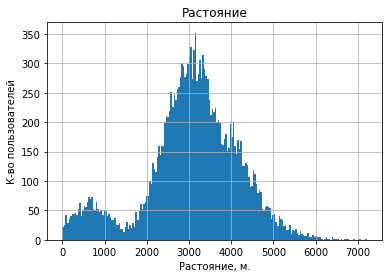

In [14]:
data_rides['distance'].hist(bins=200);
plt.title('Растояние')
plt.xlabel('Растояние, м.')
plt.ylabel('К-во пользователей')


Text(0, 0.5, 'К-во пользователей')

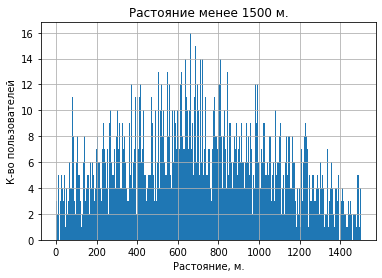

In [15]:
distance = data_rides[data_rides['distance'] <= 1500]
distance['distance'].hist(bins=300);
plt.title('Растояние менее 1500 м.')
plt.xlabel('Растояние, м.')
plt.ylabel('К-во пользователей')


In [16]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Посмотрели распрееление расстояния поездок. Обнаружили, что есть два пика - от 0 до 1500 м. и от 1500 до 7200. Более подробно посмотрели пик от 0 до 1500 м. Это пик коротких расстояний до 1.5 км. Нам сложно объяснить природу этого пика. 

Text(0, 0.5, 'К-во пользователей')

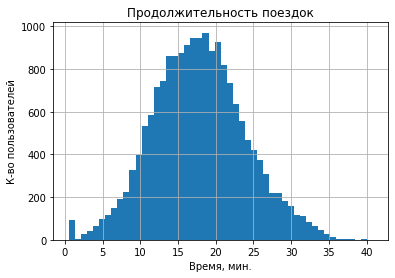

In [17]:
data_rides['duration'].hist(bins=50);
plt.title('Продолжительность поездок')
plt.xlabel('Время, мин.')
plt.ylabel('К-во пользователей')


In [18]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Text(0, 0.5, 'К-во пользователей')

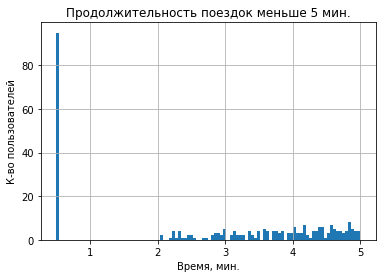

In [19]:
duration = data_rides[data_rides['duration'] <= 5]
duration['duration'].hist(bins=100);
plt.title('Продолжительность поездок меньше 5 мин.')
plt.xlabel('Время, мин.')
plt.ylabel('К-во пользователей')


Мы посмотрели распределение времени поездок. Увидели, что есть полуминутный пик. Посмотрели поближе часть распределения от 0 до 5 минут. Мы думаем, что пик связан со случайным включением самоката.

#### Шаг 3. Исследовательский анализ данных

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

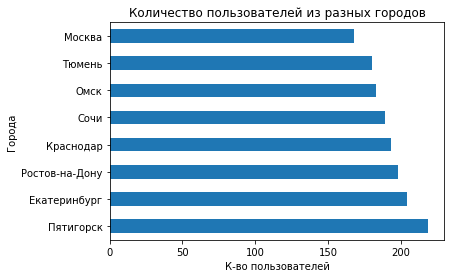

In [20]:
city = data_users['city'].value_counts()
city.plot.barh()
plt.title('Количество пользователей из разных городов')
plt.xlabel('К-во пользователей')
plt.ylabel('Города')

city

В данных фигурирует восемь городов. Наиболее часто самокаты GoFast используются в Пятигорске и Екатеринбурге. В Москве сервис GoFast наименее популярен из восьми упомянутых городов.

In [21]:
free = data_users[data_users['subscription_type'] == 'free']
display(free.head())
print(free['subscription_type'].count())

ultra = data_users[data_users['subscription_type'] == 'ultra']
display(ultra.head())
print(ultra['subscription_type'].count())

,user_id,name,age,city,subscription_type
699,700,Айдар,22,Омск,free
700,701,Иван,31,Екатеринбург,free
701,702,Мирослава,20,Екатеринбург,free
702,703,Иван,30,Пятигорск,free
703,704,Мирон,29,Ростов-на-Дону,free


835


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


699


free     835
ultra    699
Name: subscription_type, dtype: int64


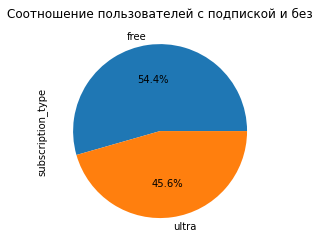

In [22]:
subscription_type = data_users['subscription_type'].value_counts()
subscription_type.plot.pie(autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без')

print(subscription_type)

In [23]:
print(free['subscription_type'].count()/ultra['subscription_type'].count())
print(free['subscription_type'].count()/(free['subscription_type'].count()+ultra['subscription_type'].count()))
print(1-(free['subscription_type'].count()/(free['subscription_type'].count()+ultra['subscription_type'].count())))

1.1945636623748213
0.5443285528031291
0.4556714471968709


Мы посмотрели соотношение пользователей с подпиской и без подписки. 54% Пользователей без подписки и 46% с подпиской. В данном датасете пользователей без подписки больше в 1.2 раза, чем с подпиской.

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

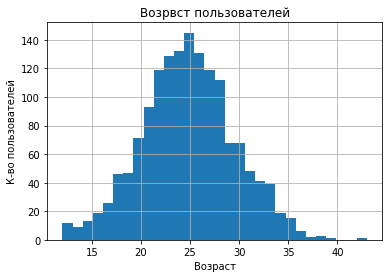

In [24]:
age = data_users['age'].value_counts()
data_users['age'].hist(bins=30);
plt.title('Возрвст пользователей')
plt.xlabel('Возраст')
plt.ylabel('К-во пользователей')

print(age)
data_users['age'].describe()

Проанализировав возраст пользователей сервисом самокатов - мы обнаружили, что 75% пользователей это люди от 20 до 30 лет. Это почти 1/3  всех фигурирующих возрастных категорий.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

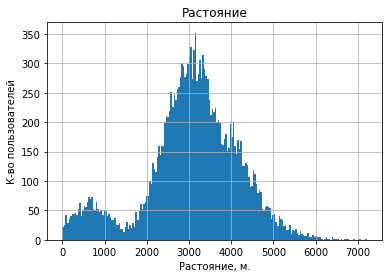

In [25]:
data_rides['distance'].hist(bins=200);
plt.title('Растояние')
plt.xlabel('Растояние, м.')
plt.ylabel('К-во пользователей')

data_rides['distance'].describe()

В основном поездки от 1.5 до 5 км. со средним значением около 3 км.

count    1796.000000
mean       10.170259
std         3.956201
min         2.035632
25%         6.921965
50%        10.094883
75%        13.456112
max        20.457599
Name: duration, dtype: float64

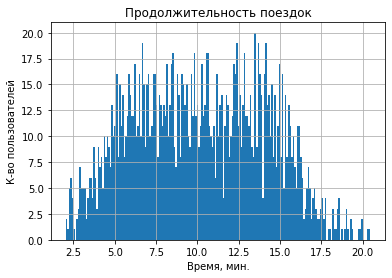

In [26]:
distance['duration'].hist(bins=200);
plt.title('Продолжительность поездок')
plt.xlabel('Время, мин.')
plt.ylabel('К-во пользователей')

distance['duration'].describe()

Мы проанализировали более подробно пик от 0 до 1500 м. Посмотрели распределение времени на данном промежутке растояний. В среднем в этом промежутке расстояний пользователи тратили 10 минут, от 2 до 20 минут.

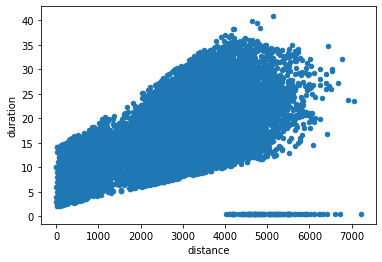

In [27]:
data_rides.plot(x='distance', y='duration', kind='scatter');

In [28]:
data_rides['distance'].corr(data_rides['duration'])

0.5367776552505346

Посмотрели корреляцию времени и растояния по всем данным - 0.54 - довольно сильная связь расстояния и времени поездки.

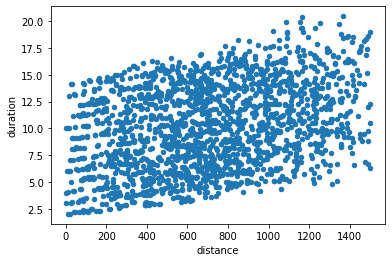

In [29]:
distance.plot(x='distance', y='duration', kind='scatter');     

In [30]:
distance['distance'].corr(distance['duration'])

0.3502959206856612

Посмотрели корреляцию времени и расстояния поездки на промежутке от 0 до 1500 м. Здесь сила связи гораздо ниже - 0.35. На этом промежутке данных время использования самокатов не всегда тесно связано с пройденным расстоянием. Видимо в этой категории данных самокат часто либо стоит и на нем не всегда едут. На графике видно, что есть категория данных в которых время затрачено много, а расстояние пройдено не большое. Либо пользователи не сразу закрыли поездку, либо использовали самокат для кратковременных перемещений, но на период решения своих дел не закрывали поездку.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

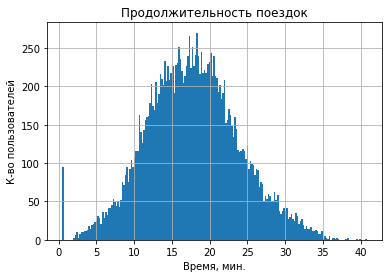

In [31]:
data_rides['duration'].hist(bins=200);
plt.title('Продолжительность поездок')
plt.xlabel('Время, мин.')
plt.ylabel('К-во пользователей')

data_rides['duration'].describe()

Мы проанализировали все данные по времени поездок. В основном поездки от 7 до 30 минут, со среднем значением 18 минут. Учитывая, что в среднем на самокатах проходят около 3 км., то средняя скоростьпри использования самокатов - около 10 км/ч. 

#### Шаг 4. Объединение данных

In [32]:
user_rides = data_users.merge(data_rides, on='user_id', how='outer')
user_rides.info()
data_users.info()
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   u

In [33]:
total_data = user_rides.merge(data_subscr, on='subscription_type', how='outer')
total_data.info()
user_rides.info()
data_subscr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
In

Мы объеденили все три файла в один датасет -'total_data'

In [34]:
total_data_free = total_data[total_data['subscription_type'] == 'free']
display(total_data_free.head())
print(total_data_free['user_id'].count())


total_data_ultra = total_data[total_data['subscription_type'] == 'ultra']
display(total_data_ultra.head())
print(total_data_ultra['user_id'].count())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


11568


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


6500


Из общего 'total_data' создали два отдельных файла, один для пользователей с подпиской - 'total_data_ultra', другой для пользователей без подписки - 'total_data_free'.

Text(0, 0.5, 'к-во пользователей')

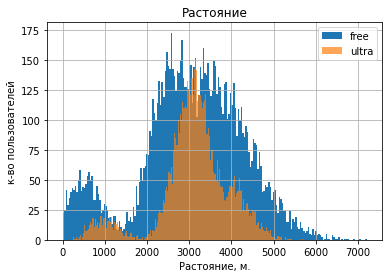

In [35]:
total_data_free['distance'].hist(bins=200, label='free');
total_data_ultra['distance'].hist(bins=200, alpha = .7, label='ultra');

plt.legend()
plt.title('Растояние')
plt.xlabel('Растояние, м.')
plt.ylabel('к-во пользователей')

In [36]:
print(total_data_free['distance'].describe())
total_data_ultra['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Мы визуализировали информацию по расстоянию поездок отдельно для пльзователей с подпиской и без подписки. Видно, что разброс больше у пользователей без подписки (ошибка средней выше). Средние примерно одинаковые.

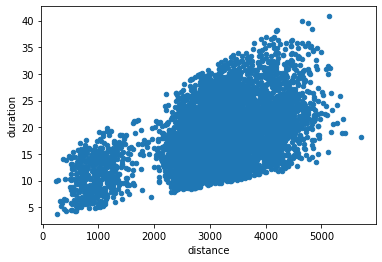

In [37]:
total_data_ultra.plot(x='distance', y='duration', kind='scatter');

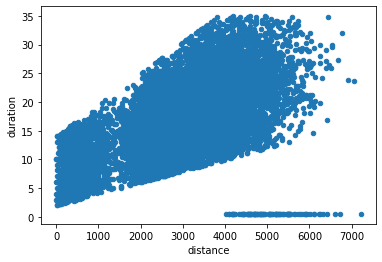

In [38]:
total_data_free.plot(x='distance', y='duration', kind='scatter');

In [39]:
total_data_ultra['distance'].corr(total_data_ultra['duration'])

0.4933405982485452

In [40]:
total_data_free['distance'].corr(total_data_free['duration'])

0.5557785138794201

Проанализировав данные о связи расстояния и времени отдельно для пользователей с подпиской и без подписки, мы обнаружили, что разрыв между двумя пиками расстояния у пользователей с подпиской выше, чем у пользователей без подписки. Т.е. у пользователей с подиской очень мало поездок в районе 1.8 км. Я затрудняюсь объяснить этот факт.

Так же выяснилось, что у пользователей с подпиской связь расстояния и затраченого времени на поездку немного слабее (0,49), чем у пользователей без подписки (0,56).

Возможно пользователи с подпиской хуже следят за тем, что бы вовремя заканчивать поездку. И у них чаще самокат простаивает.

Text(0, 0.5, 'К-во пользователей')

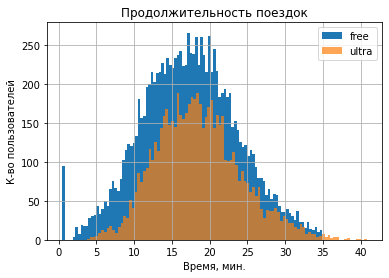

In [41]:
total_data_free['duration'].hist(bins=100, label='free');
total_data_ultra['duration'].hist(bins=100, alpha = .7, label='ultra');

plt.legend()
plt.title('Продолжительность поездок')
plt.xlabel('Время, мин.')
plt.ylabel('К-во пользователей')

In [42]:
print(total_data_free['duration'].describe())
total_data_ultra['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

У пользователей с подпиской среднее затраченное время больше на 1 минуту, чем у пользователей без подписки. Также min- и max- значения выше у пользователей с подпиской.

#### Шаг 5. Подсчёт выручки

In [43]:
total_data['duration'] = np.ceil(total_data['duration'])
total_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Округлили продолжительность каждой поездки.

In [44]:
sum_dist = total_data.groupby(['user_id', 'month']).agg({'distance':'sum', 'duration':'sum', 'month':'count', 'start_ride_price':'first', 'minute_price':'first', 'subscription_fee':'first'}) 
display(sum_dist)
sum_dist.info()

distance  duration  month  start_ride_price  minute_price  \
user_id month                                                                  
1       1       7027.511294      42.0      2                 0             6   
        4        754.159807       7.0      1                 0             6   
        8       6723.470560      46.0      2                 0             6   
        10      5809.911100      32.0      2                 0             6   
        11      7003.499363      56.0      3                 0             6   
...                     ...       ...    ...               ...           ...   
1534    6       3409.468534      26.0      2                50             8   
        8       7622.453034      48.0      2                50             8   
        9       4928.173852      23.0      1                50             8   
        11     13350.015305      78.0      4                50             8   
        12      2371.711192      16.0      1                50             8   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
...                         ...  
1534    6                     0  
        8                     0  
        9                     0  
        11                    0  
        12                    0  

[11331 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          11331 non-null  float64
 1   duration          11331 non-null  float64
 2   month             11331 non-null  int64  
 3   start_ride_price  11331 non-null  int64  
 4   minute_price      11331 non-null  int64  
 5   subscription_fee  11331 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 576.5 KB


In [45]:
sum_dist = sum_dist.rename(columns={'distance':'sum_distance', 'duration':'sum_duration', 'month':'count'})
sum_dist.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sum_distance      11331 non-null  float64
 1   sum_duration      11331 non-null  float64
 2   count             11331 non-null  int64  
 3   start_ride_price  11331 non-null  int64  
 4   minute_price      11331 non-null  int64  
 5   subscription_fee  11331 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 576.5 KB


Создали датасет sum_dist и добавили шесть столбцов - 'sum_distance' - суммарное расстояние для каждого пользователя за каждый месяц; 'count' - количество поездок для каждого пользователя за каждый месяц; 'sum_duration' - суммарное время для каждого пользователя за каждый месяц, а так же 'start_ride_price', 'minute_price' и 'subscription_fee'.

In [46]:
print(sum_dist.isna().sum())
sum_dist = sum_dist.reset_index()
sum_dist['proceeds'] = (sum_dist['start_ride_price']*sum_dist['count'])+(sum_dist['minute_price']*sum_dist['sum_duration'])+sum_dist['subscription_fee']
display(sum_dist.head())

sum_distance        0
sum_duration        0
count               0
start_ride_price    0
minute_price        0
subscription_fee    0
dtype: int64


,user_id,month,sum_distance,sum_duration,count,start_ride_price,minute_price,subscription_fee,proceeds
0,1,1,7027.511294,42.0,2,0,6,199,451.0
1,1,4,754.159807,7.0,1,0,6,199,241.0
2,1,8,6723.470560,46.0,2,0,6,199,475.0
3,1,10,5809.911100,32.0,2,0,6,199,391.0
4,1,11,7003.499363,56.0,3,0,6,199,535.0


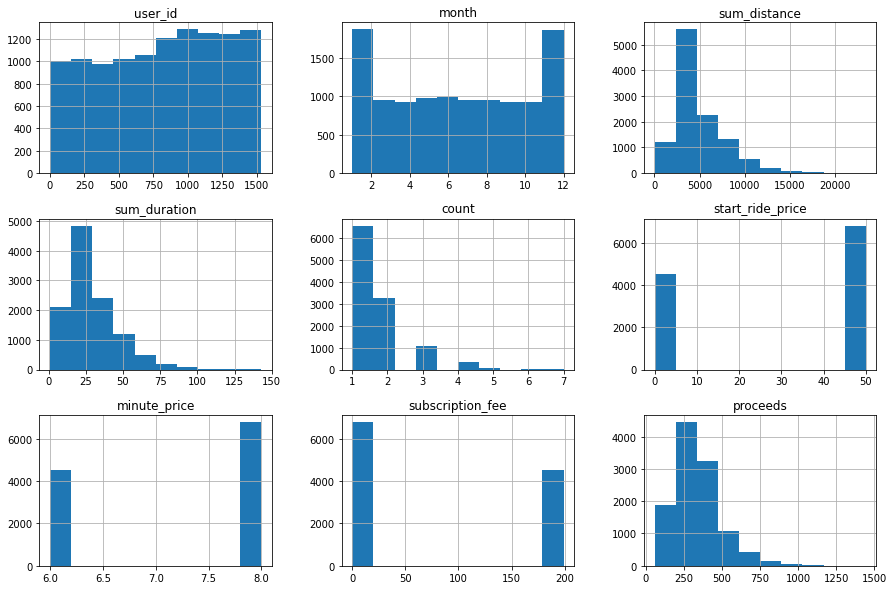

In [47]:
sum_dist.hist(figsize=(15,10));

Мы рассчитали помесячную выручку для каждого пользователя с подпиской и без подписки.

#### Шаг 6. Проверка гипотез

In [48]:
alpha = 0.05
results_duration = st.ttest_ind(total_data_ultra['duration'], total_data_free['duration'], alternative='greater')
print(f'p-value:{results_duration.pvalue}')
if results_duration.pvalue < alpha:
    print('Вероятно, что пользователи с подпиской тратят больше времени на поездки')
else:
    print('Нет оснований говорить, что пользователи с подпиской тратят больше времени на поездкти чем пользователи без подписки')


p-value:1.2804098316645618e-34
Вероятно, что пользователи с подпиской тратят больше времени на поездки


Мы проверили:

Нулевую гипотезу - "пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки"

Альтернативную гипотезу - "пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки"

Так как значение p-value оказалось меньше заданного порога достоверности (0.05), то мы имеем все основания отвергнуть нулевую гипотезу о равенстве затраченого времени на поездки у пользователей с подпиской и без и принимаем альтернативную гипотезу  о том, что пользователи с подпиской тратят больше времени на поездки.

In [49]:
optim = 3130
results_1distance = st.ttest_1samp(total_data_ultra['distance'], optim, alternative='greater')
print(f'p-value:{results_1distance.pvalue}')
if results_1distance.pvalue < alpha:
    print('Среднее расстояние, которое проезжают пользователей с подпиской больше 3130 м.')
else:
    print('Нет оснований говорить, что среднее расстояние, которое проезжают пользователей с подпиской больше 3130 м.')


p-value:0.9195368847849785
Нет оснований говорить, что среднее расстояние, которое проезжают пользователей с подпиской больше 3130 м.


Мы проверили:

Нулевую гипотезу - "Среднее расстояние, которое проезжают пользователи с подпиской равно 3130 м."

Альтернативная гипотеза - "Среднее расстояние, которое проезжают пользователи с подпиской больше 3130 м."

Так как значение p-value оказалось больше заданного порога значимости (0.05), то у нас нет оснований отвергать нулевую гипотезу о равенстве среднего расстояния 3130 м. Соответственно мы можем говорить, о том, что пользователи с подпиской в среднем проезжают не более 3130 м. Тем самым износ самокатов у пользователей с подпиской - оптимальный.

In [50]:
display(sum_dist['user_id'].count())

sum_dist_free = sum_dist[sum_dist['minute_price'] == 8]
display(sum_dist_free.head())
print(sum_dist_free['user_id'].count())


sum_dist_ultra = sum_dist[sum_dist['minute_price'] == 6]
display(sum_dist_ultra.head())
print(sum_dist_ultra['user_id'].count())

11331

,user_id,month,sum_distance,sum_duration,count,start_ride_price,minute_price,subscription_fee,proceeds
4533,700,1,2515.690719,15.0,1,50,8,0,170.0
4534,700,2,13446.659764,89.0,5,50,8,0,962.0
4535,700,3,3798.334905,19.0,1,50,8,0,202.0
4536,700,4,2984.551206,16.0,1,50,8,0,178.0
4537,700,6,5927.650988,29.0,2,50,8,0,332.0


6798


,user_id,month,sum_distance,sum_duration,count,start_ride_price,minute_price,subscription_fee,proceeds
0,1,1,7027.511294,42.0,2,0,6,199,451.0
1,1,4,754.159807,7.0,1,0,6,199,241.0
2,1,8,6723.470560,46.0,2,0,6,199,475.0
3,1,10,5809.911100,32.0,2,0,6,199,391.0
4,1,11,7003.499363,56.0,3,0,6,199,535.0


4533


count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: proceeds, dtype: float64

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: proceeds, dtype: float64

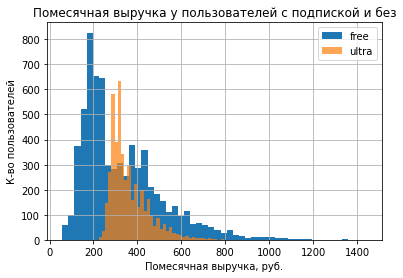

In [51]:
sum_dist_free['proceeds'].hist(bins=50, label='free');
sum_dist_ultra['proceeds'].hist(bins=50, alpha = .7, label='ultra');

plt.legend()
plt.title('Помесячная выручка у пользователей с подпиской и без')
plt.xlabel('Помесячная выручка, руб.')
plt.ylabel('К-во пользователей')

display(sum_dist_free['proceeds'].describe())
sum_dist_ultra['proceeds'].describe()

В среднем пользователи с подпиской ежемесячно тратят больше на 34 рубля чем пользователи без подписки.

In [52]:
results_2distance = st.ttest_ind(sum_dist_ultra['proceeds'], sum_dist_free['proceeds'], alternative='greater')
print(f'p-value:{results_2distance.pvalue}')
if results_2distance.pvalue < alpha:
    print('Вероятно, что выручка по месяцам от пользователей с подпиской выше, чем выручка от пользователей без подписки')
else:
    print('Нет оснований говорить, что выручка по месяцам от пользователей с подпиской, чем выручка от пользователей без подписки')

p-value:1.8850394384715216e-31
Вероятно, что выручка по месяцам от пользователей с подпиской выше, чем выручка от пользователей без подписки


Мы проверили:

Нулевую гипотезу - "Выручка по месяцам от пользователей с подпиской такая же как и от пользователей без подписки"

Альтернативная гипотеза - Выручка по месяцам от пользователей с подпиской выше, чем от пользователей без подписки"

Так как значение p-value меньше заданного парога значимости (0.05) мы имеем все основания отвернуть нулевую гипотезу о равенстве выручки по месяцам от пользователей с подпиской и без. И принимаем альтернативную гипотезу о том, что выручка по месяцам выше от пользователей с подпиской.

Ответ на вопрос 6.4. - для проверки гипотизы о том, что обновление серверов значимо снизит количество обращений в техподдержку, необходим scipy.stats.ttest_rel (для альтернативной левосторонней гипотезы, alternative='less'). Этот тест для двух зависимых (парных) выборок и мы проверяем гипотезу о равенстве среднего значения генеральной совокупности до и после изменения (обновления серверов).

Тест для альтернативной левосторонней гипотезы, alternative='less' в данном случае показывает, что среднее значение обращений после обновления серверов меньше, чем до обновления - т.е. обращений после обновления стало меньше - это нам и требуется доказать.

<b>Выводы:</b>

Цель проекта - понять - приносят ли сервису выгоду пользователи с подпиской, по сравнению с пользователями без подписки
    
Мы выяснили:    1.) тратят ли пользователи с подпиской больше времени на поездки.
                2.) Оптимально ли используется самокат пользователями с подпиской (проветить - среднее растояние пользователей с подпиской не более 3130 м.)
                3.) выяснить - будет ли помесячная выручка пользователей с подпиской выше, чем у пользователей без подписки

Так же мы обнаружили, что:

1) наиболее часто самокаты GoFast используются в Пятигорске и Екатеринбурге. В Москве сервис GoFast наименее популярен из восьми упомянутых городов.

2) 54% Пользователей без подписки и 46% с подпиской. В данном датасете пользователей без подписки больше в 1.2 раза, чем с подпиской.

3) 75% пользователей это люди от 20 до 30 лет. Это почти 1/3  всех фигурирующих возрастных категорий.

4) В основном поездки от 1.5 до 5 км, со средним значением около 3 км.

5) есть два пика в распределении растояния поездок - от 0 до 1500 м. и от 1500 до 7200. Более подробно посмотрели пик от 0 до 1500 м. Это пик коротких расстояний до 1.5 км, в среднем в этом промежутке расстояний пользователи тратили 10 минут, от 2 до 20 минут. Нам сложно объяснить природу этого пика.

6) обнаружили довольно сильную положительную линейную связь расстояния и времени поездки (коэффициент корреляции 0.54).

7) Мы посмотрели корреляцию времени и расстояния поездки на промежутке от 0 до 1500 м. Здесь сила связи гораздо ниже -  0.35. На этом промежутке данных время использования самокатов не всегда тесно связано с пройденным расстоянием. Видимо в этой категории данных самокат часто либо стоит и на нем не всегда едут. Есть категория данных в которых время затрачено много, а расстояние пройдено не большое. Либо пользователи не сразу закрыли поездку, либо использовали самокат для кратковременных перемещений, но на период решения своих дел не закрывали поездку.

8) В основном все поездки от 7 до 30 минут, со среднем значением 18 минут. Учитывая, что в среднем на самокатах проходят около 3 км., то средняя скоростьпри использования  самокатов - около 10 км/ч. 

9) Проанализировав данные о связи расстояния и времени отдельно для пользователей с подпиской и без подписки, мы обнаружили, что разрыв между двумя пиками расстояния у пользователей с подпиской выше, чем у пользователей без подписки. Т.е. у пользователей с подиской очень мало поездок в районе 1.8 км. Мы затрудняемся объяснить этот факт.

10) У пользователей с подпиской связь расстояния и затраченого времени на поездку немного слабее (0,49), чем у пользователей без подписки (0,56). Возможно пользователи с подпиской хуже следят за тем, что бы вовремя заканчивать поездку. И у них чаще самокат простаивает.

Анализ данных показал:

1) пользователи с подпиской тратят достоверно больше времени на поездки (в среднем на 1 минуту).
2) помесячная выручка от них достоверно выше (на 34 рубля за каждый месяц от каждого пользователя), чем у пользователей без подписки
3) мы можем говорить, о том, что пользователи с подпиской в среднем проезжают не более 3130 м. Тем самым износ самокатов у пользователей с подпиской - оптимальный.

Таким образом, пользователи с подпиской выгодны для компании и увеличение количества пользователей с подпиской будет выгодно компании.

Тем самым различные акции по увеличению пользователей с подпиской будут выгодны компании.


#### Шаг 7. Распределения

In [53]:
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

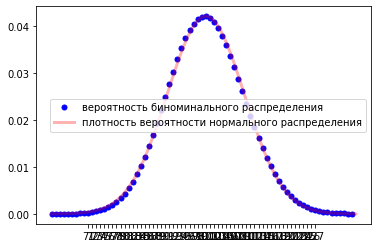

условие выполняется


In [54]:
def linspace(start, stop, num):
    step=(stop-start)/(num-1)
    result=[]
    for i in range(num):
        result.append(start+step*i)
    return result
n=1000
p=0.1

left=int(n*p-4*sqrt(n*p*(1-p)))
right=int(n*p+4*sqrt(n*p*(1-p)))
x=list(range(max(0, left), right))
ax=plt.subplot()
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='вероятность биноминального распределения')
mu=n*p
sigma=sqrt(n*p*(1-p))
x=linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
x_ticks=list(range(int(mu-3*sigma), int(mu+3*sigma), 1))
ax.set_xticks(x_ticks)
ax.legend(loc='best')
plt.show()
if (mu-(3*sigma) >=0) and ((mu+(3*sigma) <= n)):
    print('условие выполняется')
else:
    print('условие не выполняется')



Данное биноминальное распределение хорошо аппроксимируется нормальным распределением. Для расчета вероятности можно использовать нормальное распределение.

In [55]:
n=1170
p=0.1
mu=n*p
sigma=sqrt(n*p*(1-p))
prob=0.95
distr = st.norm(mu, sigma)
x=100
result=1-distr.cdf(x)
print(result)

0.9512064034722397


Пример с промокодами - это биноминальное распределение. Для начала возьмем распределение с мю=100 и дисперсией 90. Так как нам дано 100 успехов и частота успехов 10%, то количество попыток 1000, соответственно дисперсия n*p*(1-p)=1000*0.1*(1-0.1)=90. 

Далее найдем вероятность получить 100 успехов с 95% вероятностью, при числе попыток 1000. При таких параметрах распределения вероятность получить не менее 100 подписок 50%, это мало.

Мы подабрали, что при n равном не менее 1170 промокодов, вероятность получить не менее 100 подписок будет 95,12%

Таким образом надо раздать не менее 1170 промокодов.

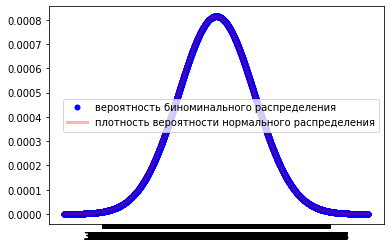

условие выполняется


In [56]:
def linspace(start, stop, num):
    step=(stop-start)/(num-1)
    result=[]
    for i in range(num):
        result.append(start+step*i)
    return result
n=1000000
p=0.4

left=int(n*p-4*sqrt(n*p*(1-p)))
right=int(n*p+4*sqrt(n*p*(1-p)))
x=list(range(max(0, left), right))
ax=plt.subplot()
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='вероятность биноминального распределения')
mu=n*p
sigma=sqrt(n*p*(1-p))
x=linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
x_ticks=list(range(int(mu-3*sigma), int(mu+3*sigma), 1))
ax.set_xticks(x_ticks)
ax.legend(loc='best')
plt.show()
if (mu-(3*sigma) >=0) and ((mu+(3*sigma) <= n)):
    print('условие выполняется')
else:
    print('условие не выполняется')



Данное биноминальное распределение хорошо аппроксимируется нормальным распределением. Для расчета вероятности можно использовать нормальное распределение.

In [57]:
n=1000000
p=0.4
mu=n*p
sigma=sqrt(n*p*(1-p))
prob=0.95
distr = st.norm(mu, sigma)
x=399500
result=distr.cdf(x)
print(result)

0.15371708296369768


Вероятность того, что уведомление откроют не более 399500 пользователей равно 15.4% - Это довольно маленькая вероятность. Следовательно вероятней, что уведомление откроют гораздо большее количество пользователей.